# Atuação em simulações de trânsito baseado na detecção de anomalias em trechos de vias

Apresentaremos nossas análises a respeito do experimento de "Atuação em simulações de trânsito baseado na detecção de anomalias em trechos de vias". Prmieiro realizamos uma validação com um escopo reduzido e em seguida executamos simulações e análises com cenários de maior magnitude.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import numpy as np
from matplotlib import rc
COLUMNS = ["hour", "minute", "last_tick", "type", "trip_id", "last_link", "duration", "distance"]

# Validação do modelo de simulação

Inicialmente validamos o modelo de simulação de eventos de trânsito (e utilização de PMVs - Placas de Mensagem Variada) implementada no **InterSCSimulator**. Para isso utilizamos um contexto controlado, composto de um grafo simples e um número reduzido de viagens.

Executamos três cenários para a validação:

- Sem eventos de fechamento de rua;

- Com eventos de fechamento de rua mas sem o auxílio de PMVs;

- Com eventos de fechamento de rua e auxílio de PMVs.

Executamos vinte (20) simulações de 10 minutos para cada cenário, resultando em três conjuntos de dados (um por cenário) que continham a saída de todas essas rodadas de simulação. Ao final realizamos análises encima desses conjuntos de dados.

## Entrada do Cenário de Validação

A seguir descreveremos as duas entradas da simulação: a descrição do mapa da cidade e a lista de viagens.

### Mapa da Cidade

Utilizamos o seguinte grafo como mapa da cidade nos três cenários, composto de  8 vértices e 8 arestas:

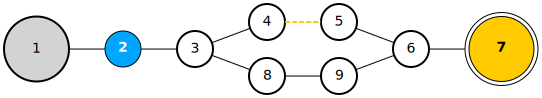

In [246]:
from graphviz import Graph

g = Graph('G')
g.attr(rankdir='LR', size='20', splines='true', ranksep='0.5')
g.attr('node', shape='circle', rankdir='LR', style='bold', fontname = "verdana")

g.node('1', style='filled,bold', fixedsize='true', width='.9')
g.node('2', fillcolor='#00A5FF', label='<<b>2</b>>', fontcolor='white', style='filled')  
g.node('3')
g.node('4')
g.node('5')
g.node('6')
g.node('7', shape='doublecircle', fillcolor='#FFCB00', label='<<b>7</b>>', fontcolor='black', style='filled', fixedsize='true', width='.9')
g.node('8')
g.node('9')
        
g.edge('1', '2')
g.edge('2', '3')
g.edge('3', '4')
g.edge('4', '5', style='dashed, bold', color='#FFCB00')
g.edge('5', '6')
g.edge('3', '8')
g.edge('8', '9')
g.edge('9', '6')
g.edge('6', '7')
g

O grafo acima modela a cidade da seguinte forma:

- Os vértices representam início/fim de uma ou mais ruas

- As arestas representam as ruas de uma cidade

- As arestas têm o mesmo tamanho (comprimento 1)

- A cada tick (etapa de simulação) os veículos andam uma aresta

Adotamos a seguinte nomenclatura para separar vértices e arestas especiais:

- Arestas amarelas representam ruas da cidade onde ocorrerão eventos de fechamento de rua (nenhum veículo passará por essa aresta durante um evento) - essas arestas só serão afetadas no cenário com eventos

- O vértice cinza representa a origem de todas as viagens simuladas

- O vértice laranja representa o destino das viagens.

- O vértice azul representa o local da cidade que contém uma PMV que alertará os motoristas sobre o fechamento de ruas

### Lista de Viagens

Nos três cenários utilizamos um total de 100 viagens, que tinham como origem o `vértice 1` e como destino o `vértice 7`.

## Análise dos Dados

### Hipóteses

Abaixo comparamos os valores de distância média dos três cenários. A nossa hipótese era que todos os veículos utilizassem o seguinte caminho no grafo apresentado anteriormente:

- No cenário **sem eventos**, que o caminho fosse o apresentado abaixo. As arestas de cor roxa representam o caminho inicial calculado e o seguido pelos veículos (as arestas que não foram usadas foram ocultadas).

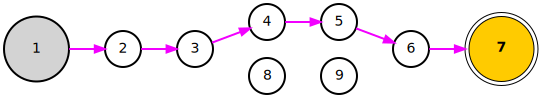

In [228]:
from graphviz import Digraph

g = Digraph('G')

g.attr(rankdir='LR', size='20', splines='true', ranksep='0.5')
g.attr('node', shape='circle', rankdir='LR', style='bold', fontname = "verdana")

g.node('1', style='filled,bold', fixedsize='true', width='.9')
g.node('3')
g.node('4')
g.node('5')
g.node('6')
g.node('7', shape='doublecircle', fillcolor='#FFCB00', label='<<b>7</b>>', fontcolor='black', style='filled', fixedsize='true', width='.9')
g.node('8')
g.node('9')

g.edge('1', '2', style='bold', color='#F200FF')
g.edge('2', '3', style='bold', color='#F200FF')
g.edge('3', '4', style='bold', color='#F200FF')
g.edge('4', '5', style='bold', color='#F200FF')
g.edge('5', '6', style='bold', color='#F200FF')
g.edge('3', '8', style='invis')
g.edge('8', '9', style='invis')
g.edge('9', '6', style='invis')
g.edge('6', '7', style='bold', color='#F200FF')

g

- No cenário **com eventos e sem PMV** que fosse utilizado o percurso no mapa abaixo. As arestas de **cor roxa** representam o caminho inicial que chegou a ser percorrido pelos veículos; as arestas de **cor preta** o caminho inicial calculado mas que não foi percorrido devido ao evento de trânsito na aresta `4 -> 5`; e as arestas de **cor verde** o caminho recalculado e percorrido após se deparar com a aresta proibida. A aresta proibida (`4 -> 5`) está tracejada.

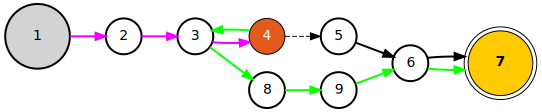

In [230]:
from graphviz import Digraph

g = Digraph('G')
g.attr(rankdir='LR', size='20', splines='true', ranksep='0.5')
g.attr('node', shape='circle', rankdir='LR', style='bold', fontname = "verdana")

g.node('1', style='filled,bold', fixedsize='true', width='.9')
g.node('3')
g.node('4', fillcolor='#E25A1C', fontcolor='white', style='filled')


g.node('5')
g.node('6')
g.node('7', shape='doublecircle', fillcolor='#FFCB00', label='<<b>7</b>>', fontcolor='black', style='filled', fixedsize='true', width='.9')
g.node('8')
g.node('9')

g.edge('1', '2', style='bold', color='#F200FF')
g.edge('2', '3', style='bold', color='#F200FF')

g.edge('4', '3', style='bold', color='#0DFF00')
g.edge('3', '4', style='bold', color='#F200FF')
g.edge('4', '5', style='dashed')
g.edge('5', '6', style='bold')
g.edge('3', '8', style='bold', color='#0DFF00')
g.edge('8', '9', style='bold', color='#0DFF00')
g.edge('9', '6', style='bold', color='#0DFF00')
g.edge('6', '7', style='bold', color='#0DFF00')
g.edge('6', '7', style='bold')

g

* No cenário **com eventos e com auxílio de PMV** que fosse utilizado o grafo abaixo. Novamente ocorre um evento de fechamento de trânsito na aresta `4 -> 5`, tornando-a proibida, contudo uma PMV posicionada no vértice 2 (cor azul) notifica os motoristas a respeito do evento, fazendo com que a rota seja recalculada previamente. Utilizamos a mesma notação, onde as arestas de **cor roxa** representam o caminho inicial que chegou a ser percorrido pelos veículos; as arestas de **cor preta** o caminho inicial calculado mas que não foi percorrido devido a notificação da PMV posicionada no vértice `2`; as arestas de **cor verde** representam o caminho recalculado e percorrido (agora recalculados pela notificação do PMV). A aresta proibida (`4 -> 5`) continua tracejada. Ainda, esperávamos que alguns veículos utilizassem o mesmo caminho caso não houvesse PMV (ignorando as notificações), tendo resultado igual ao cenário citado anteriormente.

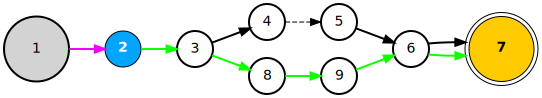

In [245]:
from graphviz import Digraph

g = Digraph('G')
g.attr(rankdir='LR', size='20', splines='true', ranksep='0.5')
g.attr('node', shape='circle', rankdir='LR', style='bold', fontname = "verdana")

g.node('1', style='filled,bold', fixedsize='true', width='.9')
g.node('2', fillcolor='#00A5FF', label='<<b>2</b>>', fontcolor='white', style='filled')  
g.node('3')
g.node('4')
g.node('5')
g.node('6')
g.node('7', shape='doublecircle', fillcolor='#FFCB00', label='<<b>7</b>>', fontcolor='black', style='filled', fixedsize='true', width='.9')
g.node('8')
g.node('9')

g.edge('1', '2', style='bold', color='#F200FF')
g.edge('2', '3', style='bold', color='#0DFF00')

g.edge('3', '4', style='bold')

g.edge('4', '5', style='dashed')
g.edge('5', '6', style='bold')
g.edge('3', '8', style='bold', color='#0DFF00')
g.edge('8', '9', style='bold', color='#0DFF00')
g.edge('9', '6', style='bold', color='#0DFF00')
g.edge('6', '7', style='bold', color='#0DFF00')
g.edge('6', '7', style='bold')

g

### Resultados e Conclusões

Inicialmente, carregamos os conjuntos de dados construídos a partir das simulações realizadas. Daqui em diante chamaremos o cenário que não ocorre eventos de `baseline`, o cenário onde ocorrem eventos mas que não possui PMV de `events` e o cenário onde ocorrem eventos e há o auxílio de PMV de `pmv`:

In [3]:
# carregando os dados
baseline_dataset_path = "validation/datasets/baseline_scenario/output.csv"
events_dataset_path = "validation/datasets/events_scenario/output.csv"
pmv_dataset_path = "validation/datasets/pmv_scenario/output.csv"

baseline_df = (pd
    .read_csv(baseline_dataset_path, delimiter=";", header=None, names=COLUMNS)
    .assign(first_tick=lambda x: x['last_tick'] - x['duration']))

events_df = (pd
    .read_csv(events_dataset_path, delimiter=";", header=None, names=COLUMNS)
    .assign(first_tick=lambda x: x['last_tick'] - x['duration']))

pmv_df = (pd
    .read_csv(pmv_dataset_path, delimiter=";", header=None, names=COLUMNS)
    .assign(first_tick=lambda x: x['last_tick'] - x['duration']))

Em seguida, agrupamos as viagens (através do ``groupby``) utilizando o campo `last_link` (esse campo indica qual foi a última rua daquela viagem). Todas as viagens têm a mesma origem e destino, sendo agrupadas. Após, calculamos a média dos valores de todos os campos de um grupo. Ao final, no campo `duration` (duração da viagem) será apresentado a média da duração das viagens, no campo `distance` (distância da viagem) a média das distâncias da viagem, e assim sucessivamente.

In [4]:
df1 = (baseline_df[['last_link', 'distance', 'duration']]
        .assign(scenario=r"Sem evento"))

df2 = (events_df[['last_link', 'distance', 'duration']]
        .assign(scenario=r"Com evento"))

df3 = (pmv_df[['last_link', 'distance', 'duration']]
        .assign(scenario=r"Com evento e PMV"))

Após, construímos um conjunto de dados final composto da média dos três cenários apresentados (através do `append`). Nos preocupamos somente com os campos `last_link`, `distance` e `duration` pois serão os únicos campos usados na análise apresentada a seguir.

In [5]:
df = df1.append(df2).append(df3)

Por fim, abaixo apresentamos os resultados finais dos três cenários utilizando gráficos de barras. Segundo nossas hipóteses (os três caminhos apresentados anteriormente), esperávamos que o cenário **sem eventos** percorresse 6 arestas, o cenário **com eventos e sem PMV** percorresse 8 arestas e o cenário **com eventos e PMV** percorresse entre 6 e 8 arestas (esperávamos que alguns veículos ignorassem as notificações). Nossas hipóteses foram confirmadas, conforme o gráfico abaixo.

No handles with labels found to put in legend.


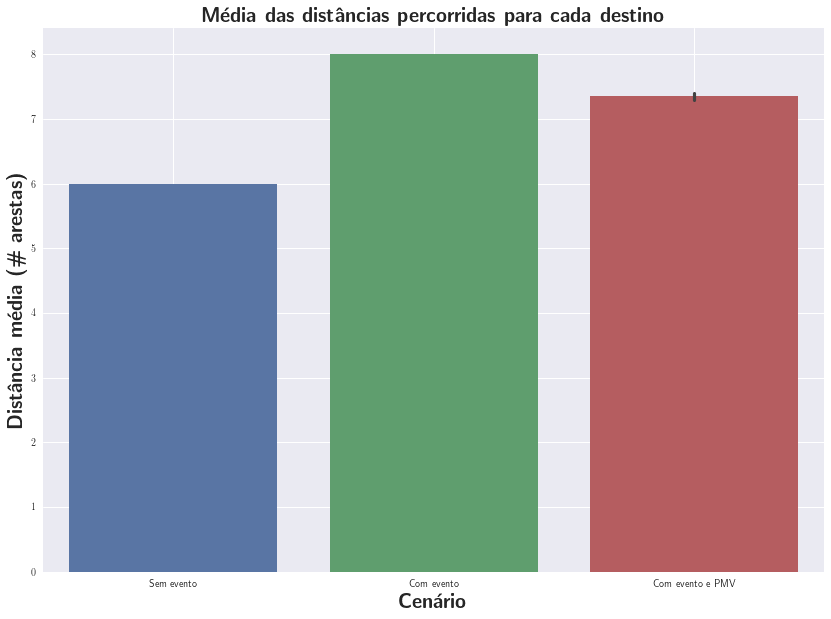

In [6]:
rc('text', usetex=True)
plt.figure(figsize=(14,10))

ax = sns.barplot(data=df, x='scenario', y='distance')

ax.set_xlabel(r'\textbf{Cen\'ario}', fontsize='20')
ax.set_ylabel(r'\textbf{Dist\^ancia m\'edia (\# arestas)}', fontsize='20')

plt.legend(loc="best",prop={"size":15})
plt.title(r"\textbf{M\'edia das dist\^ancias percorridas para cada destino}", size=20)
plt.grid(True)
sns.set(font_scale = 1.5)

plt.show()

Fizemos uma análise semelhante também para as durações das viagens, conforme apresentado no gráfico abaixo.

Uma viagem dura sempre 2 ticks mais o tempo utilizado para percorrer as arestas (uma aresta por tick) e o recálculo de um caminho custa um tick. Por isso, esperávamos agora que o cenário **sem eventos** durasse 8 ticks (2+6 por terem 6 arestas), o cenário **com eventos e sem PMV** durasse 11 ticks (2+8 arestas+1 pelo recálculo) e o cenário **com eventos e PMV** durasse entre 9 e 11 ticks (2+8 arestas+1 pelo recálculo para os motoristas que ignorem o PMV e 2+6 arestas+1 para os motoristas que sigam a notificação do PMV). Nossas hipóteses foram confirmadas, conforme o gráfico abaixo.

No handles with labels found to put in legend.


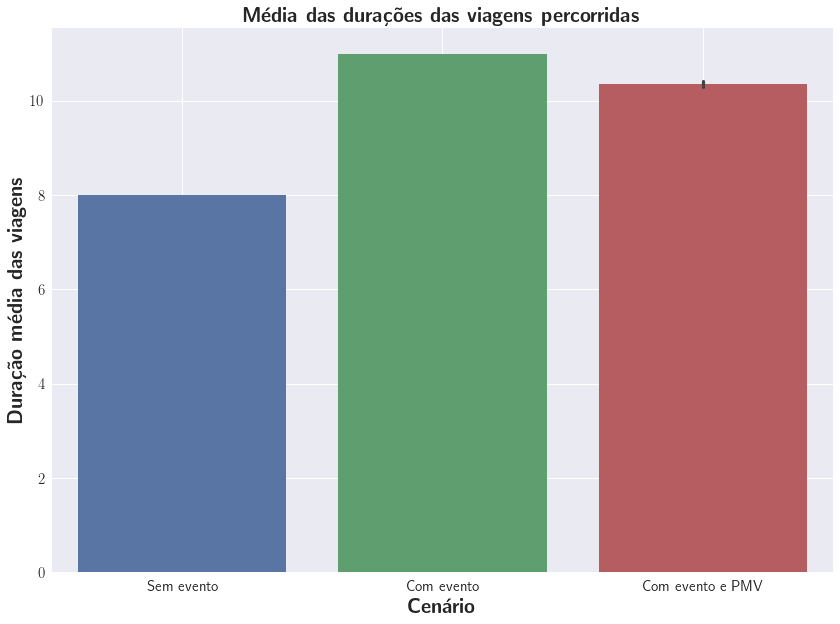

In [7]:
plt.figure(figsize=(14,10))

ax = sns.barplot(data=df, x='scenario', y='duration')

ax.set_xlabel(r'\textbf{Cen\'ario}', fontsize='20')
ax.set_ylabel(r'\textbf{Dura\c{c}\~ao m\'edia das viagens}', fontsize='20')

plt.legend(loc="best",prop={"size":15})
plt.title(r"\textbf{M\'edia das dura\c{c}\~oes das viagens percorridas}", size=20)
plt.grid(True)
sns.set(font_scale = 1.5)

plt.show()

Dessa forma, entendemos que tanto o modelo de trânsito quanto o modelo de PMVs implementados no InterSCSimulator são condizentes com o que esperávamos e que podiamos, de fato, utilizarmos num cenário maior.

# Simulação de maior escala

A seguir apresentaremos nossa análise para uma simulação com uma escala maior, que se assemelhe a cidade de São Paulo. Neste experimento utilizaremos um mapa real da cidade de São Paulo e como referência viagens da pesquisa Origem-Destino do ano de 2007.

Nesta simulação executamos cinco cenários:

- Sem eventos de fechamento de rua;

- Com eventos de fechamento de rua mas sem o auxílio de PMVs;

- Com eventos de fechamento de rua e auxílio de 2 PMVs;

- Com eventos de fechamento de rua e auxílio de 4 PMVs;

- Com eventos de fechamento de rua e auxílio de 6 PMVs.

Executamos a simulação dos cenários vinte (20) vezes e construímos cinco conjuntos de dados (um por cenário) que continham a saída de todas essas rodadas de simulação. Ao final realizamos análises encima desses conjuntos de dados.

## Entrada da Simulação

A seguir descreveremos as duas entradas da simulação do cenário realístico: a descrição do mapa da cidade e a lista de viagens.

### Mapa da Cidade

Utilizamos o mapa da cidade de São Paulo como grafo a ser utilizado na simulação. O mapa é um arquivo `xml` construído à partir do mapa real da cidade disponível no Open Street Map.

### Lista de Viagens

Utilizamos todas as viagens da pesquisa Origem Destino do ano de 2007, mas reduzimos o número dessas viagens para 1/5 da frequência. Então, todas as viagens continuam ocorrendo, mas agora uma viagem que ocorre 1000 vezes ocorrerá 200 vezes.

### Paineis de Mensagem Variada (PMVs)

Abaixo apresentamos os locais onde posicionamos as PMVs dos cenários simulados. As duas placas **de cor azul** foram utilizadas no cenário com 2 PMVs, as placas de **cor azul e verde** foram utilizadas no cenário com 4 PMVs e todas as placas (cores **azul, verde e vermelho**) foram utilizadas no cenário com 6 PMVs.

![Mapa com PMVs](img/map_sign_boards_very_nice.png)


## Análise dos Dados

Inicialmente, carregaremos os cinco conjuntos de dados (datasets).

### Hipótese

Abaixo comparamos os valores de distância média dos cinco cenários. A nossa hipótese era que o cenário sem eventos fosse o limite inferior e o cenário com eventos (e sem PMVs) o limite superior. Ou seja: o cenário sem eventos deveria ser o que os motoristas **demorassem menos** em seus trajetos, percorrendo **distâncias menores**, e o com eventos que **demorassem mais**, percorrendo **distâncias maiores**.

Entre esses dois limiares esperávamos que ficassem os cenários com PMVs, onde com 2 e 4 PMVs uma diferença significativa com relação a não ter PMVs ocorresse, e 6 PMVs não impactasse tanto (possibilitando concluir que a adição das últimas duas placas não tivesse tanto proveito).

### Resultados e Conclusões

Inicialmente, carregaremos os cinco datasets gerados. Os datasets são os seguintes:

- Dataset 1: O chamaremos de `non_events`, e apresenta uma simulação no cenário onde não ocorrem acidentes

- Dataset 2: O chamaremos de `events`, e apresenta uma simulação no cenário onde ocorrem acidentes e não existem PMVs disponíveis

- Dataset 3: O chamaremos de `events_pmv2`, e apresenta uma simulação no cenário onde ocorrem acidentes e existem dois PMVs

- Dataset 4: O chamaremos de `events_pmv4`, e apresenta uma simulação no cenário onde ocorrem acidentes e existem quatro PMVs

- Dataset 5: O chamaremos de `events_pmv6`, e apresenta uma simulação no cenário onde ocorrem acidentes e existem seis PMVs

In [9]:
NON_EVENTS_DATASET_PATH = "city_scale/datasets/baseline_scenario/output.csv"
EVENTS_DATASET_PATH = "city_scale/datasets/events_scenario/output.csv"
EVENTS_2PMVS_DATASET_PATH = "city_scale/datasets/pmv_2_scenario/output.csv"
EVENTS_4PMVS_DATASET_PATH = "city_scale/datasets/pmv_4_scenario/output.csv"
EVENTS_6PMVS_DATASET_PATH = "city_scale/datasets/pmv_6_scenario/output.csv"


non_events_df = (pd
    .read_csv(NON_EVENTS_DATASET_PATH, delimiter=";", header=None, names=COLUMNS)
    .assign(has_events=False)
    .assign(pmvs=0))

events_df = (pd
    .read_csv(EVENTS_DATASET_PATH, delimiter=";", header=None, names=COLUMNS)
    .assign(has_events=True)
    .assign(pmvs=0))

events_2pmvs_df = (pd
    .read_csv(EVENTS_2PMVS_DATASET_PATH, delimiter=";", header=None, names=COLUMNS)
    .assign(has_events=True)
    .assign(pmvs=2))

events_4pmvs_df = (pd
    .read_csv(EVENTS_4PMVS_DATASET_PATH, delimiter=";", header=None, names=COLUMNS)
    .assign(has_events=True)
    .assign(pmvs=4))

events_6pmvs_df = (pd
    .read_csv(EVENTS_6PMVS_DATASET_PATH, delimiter=";", header=None, names=COLUMNS)
    .assign(has_events=True)
    .assign(pmvs=6))

datasets = [non_events_df, events_df, events_2pmvs_df, events_4pmvs_df, events_6pmvs_df]

Então, utilizamos somente as viagens que sofrem alguma alteração em suas durações (utilizamos o método `nunique` e reitramos os que apresentam apenas uma ocorrência, que indica que a duração nunca muda). Preenchemos um arranjo chamado `affected_trips` com a lista de viagens que tem durações variando em algum conjunto de dados.

In [10]:
def count_durations_ocorrences(data):
    return data.assign(ocrr=data.duration.nunique())[['ocrr', 'trip_id']].iloc[0]

affected_trips = []

for dataset in datasets:
    df = (dataset
     .groupby('trip_id')
     .apply(count_durations_ocorrences))
    
    dataset_affected_trips = df[df.ocrr != 1].trip_id.values
    
    for trip in dataset_affected_trips:
        affected_trips.append(trip)
        
affected_trips = np.unique(affected_trips)

In [11]:
v1 = non_events_df[non_events_df.trip_id.isin(affected_trips)].assign(scenario="Sem Eventos")
v2 = events_df[events_df.trip_id.isin(affected_trips)].assign(scenario="Com Eventos")
v3 = events_2pmvs_df[events_2pmvs_df.trip_id.isin(affected_trips)].assign(scenario="Com Eventos e 2 PMVs")
v4 = events_4pmvs_df[events_4pmvs_df.trip_id.isin(affected_trips)].assign(scenario="Com Eventos e 4 PMVs")
v5 = events_6pmvs_df[events_6pmvs_df.trip_id.isin(affected_trips)].assign(scenario="Com Eventos e 6 PMVs")

# Troco os underscores (_) por pontos (.) pois utilizarei o LaTeX como engine gráfica
v1 = (v1.assign(trip_id=lambda x: x.trip_id.str.replace("_", ".")))

v2 = (v2.assign(trip_id=lambda x: x.trip_id.str.replace("_", ".")))

v3 = (v3.assign(trip_id=lambda x: x.trip_id.str.replace("_", ".")))

v4 = (v4.assign(trip_id=lambda x: x.trip_id.str.replace("_", ".")))

v5 = (v5.assign(trip_id=lambda x: x.trip_id.str.replace("_", ".")))

Em seguida, criamos um novo dataset com apenas as viagens afetadas (arranjo `affected_trips`) e o armazenamos no dataframe `affected_trips_df`. Só utilizaremos no passo a seguir os atributos `pmvs` e `duration`. 

In [12]:
affected_trips_df = v1.append(v2).append(v3).append(v4).append(v5)

final_df = affected_trips_df[['scenario', 'duration']]

Abaixo apresentamos as médias e desvios padrão de tempo de viagem entre os cinco conjuntos de dados. Os dados são relativamente próximos, o que não permite conclusões (a visualização não fica clara).

No handles with labels found to put in legend.


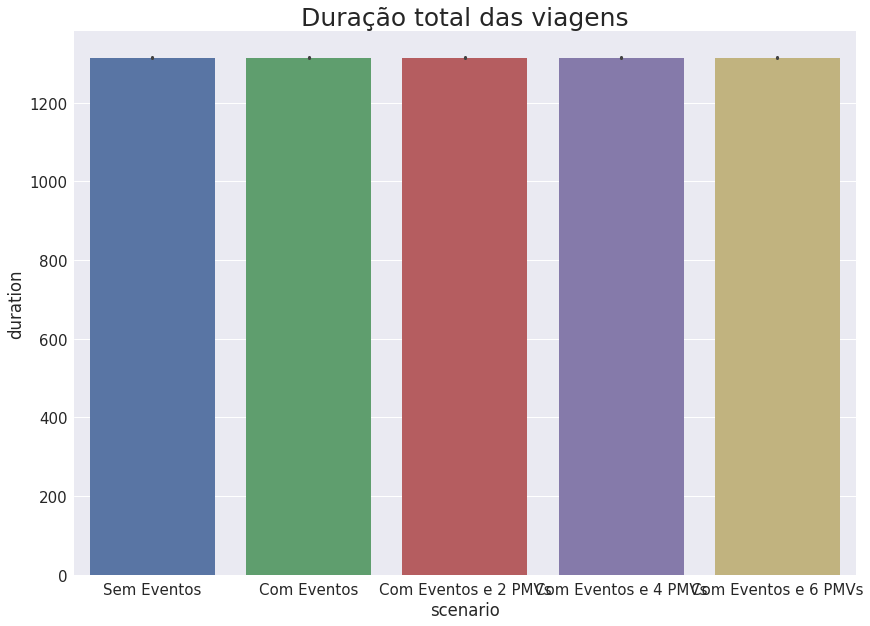

In [14]:
rc('text', usetex=False)

plt.figure(figsize=(14,10))

ax = sns.barplot(data=final_df, x='scenario', y='duration')
plt.legend(loc="best",prop={"size":20})
plt.title("Duração total das viagens", size=25)
sns.set(font_scale = 1.5)

plt.show()

Para facilitar a visualização dos dados anteriores, faremos a porcentagem da piora entre o cenário sem eventos e os cenários com eventos (incluindo PMVs), pois sabemos que o cenário **sem eventos** pode ser considerado mais rápido que os outros - dessa forma, o utilizaremos como **limite inferior**.

Calculamos as médias dos diferentes cenários:

In [15]:
lower_bound = v1.duration.mean()
lower_bound

1313.7326247602216

In [16]:
v2_df = v2.duration.mean()
v3_df = v3.duration.mean()
v4_df = v4.duration.mean()
v5_df = v5.duration.mean()

Então, calculamos a porcentagem com relação aos outros cenários; armazenamos em:

- `p1` a diferença de porcentagem entre o cenário **com evento** e **sem evento**

- `p2` a diferença de porcentagem entre o cenário **com evento e 2 PMVs** e **sem evento**

- `p3` a diferença de porcentagem entre o cenário **com evento e 4 PMVs** e **sem evento**

- `p4` a diferença de porcentagem entre o cenário **com evento e 6 PMVs** e **sem evento**

In [17]:
p1 = ((v2_df/lower_bound) -1)*100
p2 = ((v3_df/lower_bound) -1)*100
p3 = ((v4_df/lower_bound) -1)*100
p4 = ((v5_df/lower_bound) -1)*100

Por fim, montamos um `DataFrame` resultante com as diferenças percentuais.

In [18]:
raw_data = {
    '%': [p1, p2, p3, p4],
    'scenario': ['Com Eventos', 'Com 2 PMVs', 'Com 4 PMVs', 'Com 6 PMVs']
}

df = pd.DataFrame(raw_data, columns = ['%', 'scenario'])

E apresentamos com um gráfico de barras a seguir.

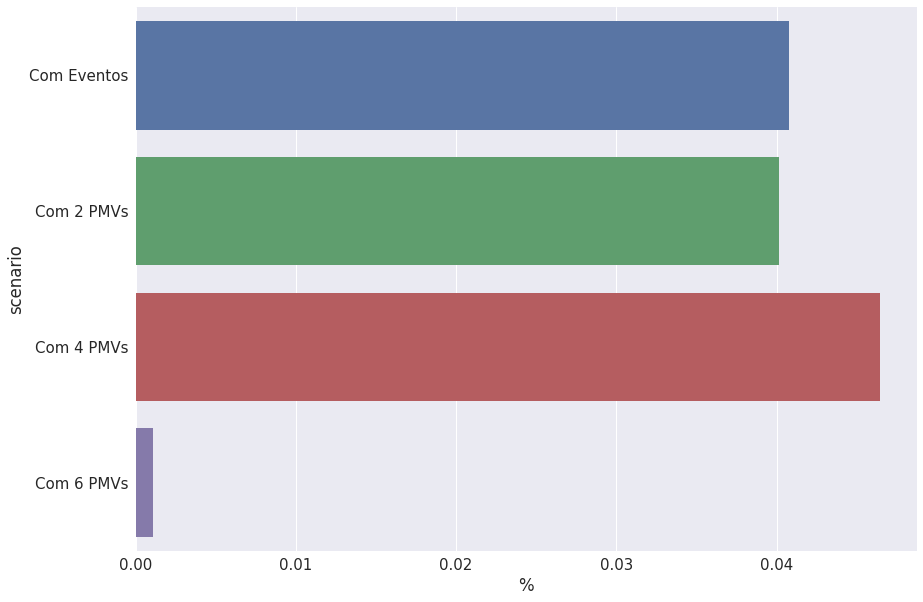

In [19]:
plt.figure(figsize=(14,10))

sns.barplot(data=df, x='%', y='scenario')

A partir dos resultados, observamos os seguintes fatos:

- A diferença entre os diferentes resultados não foi significativa - acreditamos que faça sentido pois os acidentes são sempre em um único ponto bem específico da cidade, mas as viagens ocorrem por toda a cidade, não sendo afetadas

- O fato de todos os valores serem positivos indica que o cenário sem eventos é, de fato, o limite inferior

- O cenário **com eventos e sem PMVs** apresentou duração menor que com **eventos e 4 PMVs**, não podendo ser um limite superior, o que nega uma de nossas hipóteses

- O cenário **com eventos e 4 PMVs** foi o que teve a maior duração em média, o que não esperávamos. Atribuímos esse resultado ao mal posicionamento das placas nesse cenário (placas verdes e azuis). Pelo fato das placas estarem muito próximas, tivemos em grande parte viagens que tiveram seu caminho **recalculado várias vezes** (cada placa alerta veículos sempre que uma rua em seu percurso está mais lenta que o normal), e o constante recálculo de trajeto aumenta a duração total. O novo caminho recalculado pode continuar tendo PMVs, o que acarreta em um novo recálculo de caminho.

- O cenário **com eventos e 6 PMVs** teve uma melhora muito significativa, o que nega outra hipótese nossa. Isso ocorreu porque o posicionamento das placas **de cor vermelha** favorece a notificação, por estar localizada em um extremo da via de acidentes, evitando a aproximação do caminho do veículo e outros PMVs, diminuindo a quantidade de vezes que o caminho é recalculado.

Identificamos as seguintes limitações neste experimento:

- Devido a utilização de poucos eventos de fechamento de rua e em um lugar específico, a visualização do impacto de uso de PMVs foi prejudicada

- Devido ao posicionamento não-ótimo de algumas placas, o resultado final não foi ideal (mas nos ajudou a concluir que o posicionamento das placas têm grande influência)

- Fatores externos (como qualidade da rede, recursos computacionais disponíveis, dentre outros) afetaram os resultados

Com as discussões apresentadas, concluímos que:

- A localização dos PMVs está fortemente correlacionado com o quanto a duração da viagem vai ser melhorada ou não. Placas muito próximas podem ter efeito contrário

- De maneira geral, entendemos que a utilização de PMVs não afeta substancialmente o trânsito da cidade. Contudo, em casos onde os eventos que causam fechamento de rua ocorrem frequentemente em uma mesma região e as placas sejam muito bem localizadas ao seu redor.